In [1]:
# Data Science Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
from scipy import stats

# My Telco Labor
import prepare

# My zillow labor
import wrangle

# Hide Pink Boxes
import warnings
warnings.filterwarnings("ignore")


# Exercise 1: Telco

### Our Telco scenario continues:

### As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer.

### In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.






### 1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.



In [2]:
# Should our data be scaled for this? Probably?
telco_train, telco_validate, telco_test = prepare.wrangle_telco()

In [3]:
telco_train.head()

,customer_id,monthly_charges,tenure,total_charges
103,0604-THJFP,75.95,59,4542.35
1334,7941-RCJOW,19.55,65,1218.65
1275,7596-IIWYC,20.25,27,538.20
1073,6445-TNRXS,114.70,68,7849.85
1320,7799-LGRDP,25.70,43,1188.20


In [4]:
# Looking at correlations 
telco_train.corr()

,monthly_charges,tenure,total_charges
monthly_charges,1.000000,0.403977,0.948194
tenure,0.403977,1.000000,0.618552
total_charges,0.948194,0.618552,1.000000


### 2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.



In [5]:
def plot_variable_pairs(df):
    sns.heatmap(telco_train.corr(), cmap="Blues")
    plt.title("Heatmap")
    plt.show();
    sns.pairplot(df, kind='reg', corner=True, plot_kws={'line_kws':{'color':'red'}})
    plt.suptitle("Pairplot")
    plt.show();


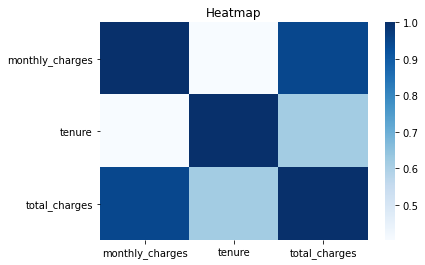

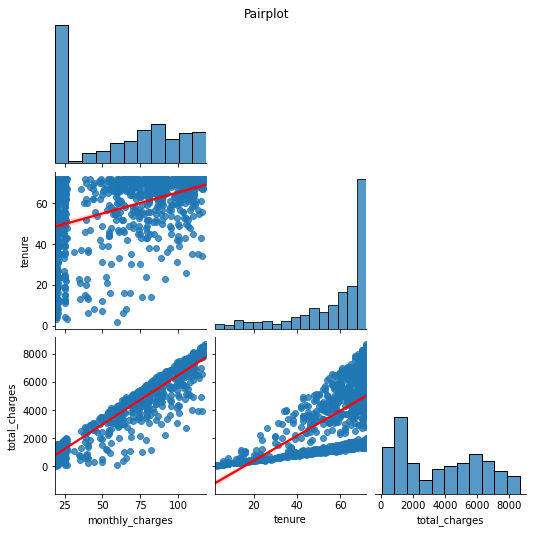

In [6]:
 plot_variable_pairs(telco_train)

### 3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.



In [7]:
def months_to_years(telco):
    telco["tenure_years"] = (round(telco.tenure/12)).astype(int)
    return telco

In [8]:
# I know this works

#telco_train["tenure_years"] = (round(telco_train.tenure/12)).astype(int)
#telco_train.head()

In [10]:
telco_train = months_to_years(telco_train)
telco_train.head()

,customer_id,monthly_charges,tenure,total_charges,tenure_years
103,0604-THJFP,75.95,59,4542.35,5
1334,7941-RCJOW,19.55,65,1218.65,5
1275,7596-IIWYC,20.25,27,538.20,2
1073,6445-TNRXS,114.70,68,7849.85,6
1320,7799-LGRDP,25.70,43,1188.20,4


### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.



In [ ]:
def plot_categorical_and_continuous_vars(df, categorical, continuous):
    

In [ ]:
telco

for con in continuous:
    for cat in categorical:
        plt.figur(figsize = (20,10))
        plt.boxplot(data = telco_train, x= df[cat] , y= df[con])

### 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.



### 6. Explore your dataset with any other visualizations you think will be helpful.



### 7. In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.

# Exercise 2: Zillow

## - What is the target variable for this upcoming project?
## - According to curriculum: "We want to be able to predict the values of single unit properties..."
## - Adam Clarified that the Target Variable is `taxvaluedollarcnt` or in my case `tax_value`
